First we will import all the required packages and get set up for the validation step.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 180
pos_dir = '../data/pos'
neg_dir = '../data/neg'

In [3]:
# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

Next, we need to create a pipeline for the validation data to be used in this part of the process:

In [4]:
# Creating a Dataset for the Training data
test = tf.keras.utils.image_dataset_from_directory(
    "../data2/test",  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['pos', 'neg'], #extensions of the folders holding the classes
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (400, 400), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 3629 files belonging to 2 classes.


In [5]:
#Create a list of the file paths to be able to review later on
file_paths = test.file_paths

Just like with validation, we will rescale the images and load the model as saved in our previous step. to confirm lets review the model arquitecture:

In [6]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1
test = test.map(lambda x, y: (scaler(x), y)) # Rescaling datasets

In [7]:
# Checking minimum and maximum pixel values in the training dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in test:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


In [8]:
model = tf.keras.models.load_model('safety_gear_detect_V3.keras')

# Show the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 400, 400, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 400, 400, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 400, 400, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 25, 25, 512)    │             

 Total params: 358,688,198 (1.34 GB)

 Trainable params: 179,343,106 (684.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 179,343,108 (684.14 MB)

Next, we will calculate the predictions from the model using .predict and calculate the loss and accuracy from the test images:

In [9]:
preds = model.predict(test)  # Running model on the test dataset
val_loss, val_acc = model.evaluate(test) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

227/227 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step
227/227 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.7579 - loss: 3.1067

Validation Loss:  3.339996337890625

Validation Accuracy:  75.0 %


Once the predictions have been recorded. Lets review the results to understand the architechture:

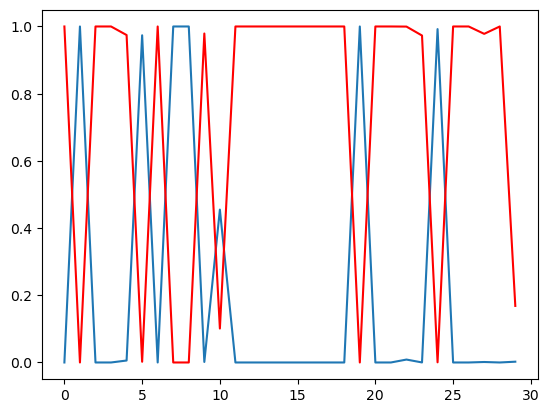

In [10]:
plt.plot(preds[:30,0])
plt.plot(preds[:30,1], color='r')

It looks like the predictions are values for each image with the probability of the image belonging to either the category 0 or 1 (pos or neg in this case).
Since we have these results, lets build a DF with the file names as well as the probabilities for pos or neg:

In [56]:
#create DF results
df_results = pd.DataFrame({'name':file_paths, 'pos':preds[:,0], 'neg':preds[:,1]})

In [57]:
df_results.describe()

,pos,neg
count,3.629000e+03,3.629000e+03
mean,2.795489e-01,6.974179e-01
std,4.289444e-01,4.394271e-01
min,0.000000e+00,8.374666e-20
25%,1.202927e-10,4.186853e-02
50%,1.754035e-05,9.999555e-01
75%,8.692803e-01,1.000000e+00
max,1.000000e+00,1.000000e+00


In [58]:
df_results.head()

,name,pos,neg
0,../data2/test\neg\image_782.jpg,2.419998e-06,9.999849e-01
1,../data2/test\pos\helmet_jacket_07952.jpg,9.999999e-01,7.922895e-09
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000e+00
3,../data2/test\neg\image_272.jpg,1.855873e-11,1.000000e+00
4,../data2/test\pos\helmet_jacket_08494.jpg,5.821980e-03,9.745134e-01


With these results, we will create a pred_image function to visualize an image as well as run the prediction using the model. This way we can visualize the image and the results at the same time:

In [42]:
from PIL import Image
def pred_image(im_name):
    # Loading the image
    image_path = '../data2/test/' + im_name
    original_image = Image.open(image_path)
    print('Picture of safety gear: \n')
    plt.imshow(original_image)
    
    # Manually preprocessing image as we did when training
    preprocessed_image = original_image.resize((400, 400))
    preprocessed_image = np.array(preprocessed_image) / 255.0

    #predict the class using the image
    predic = model.predict(np.expand_dims(preprocessed_image, axis = 0))
    labels = ['pos', 'neg']

    preds_class = np.argmax(predic)
    preds_label = labels[preds_class]

    print(f'\nPredicted Class: {preds_label}')
    print(f'\nConfidence Score: {predic[0][preds_class]}')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step

Predicted Class: pos

Confidence Score: 0.9999998807907104


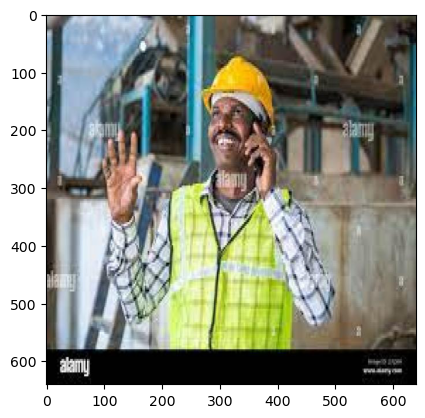

In [43]:
#testing for a random positive image
pred_image('pos/helmet_jacket_07350.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step

Predicted Class: neg

Confidence Score: 0.9999988079071045


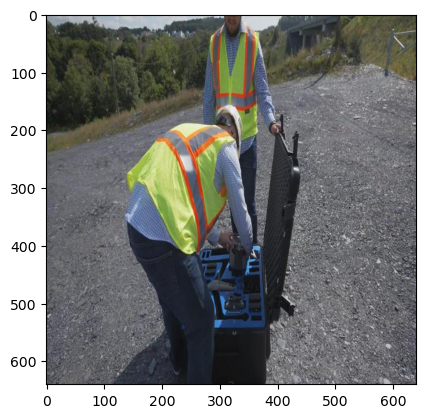

In [44]:
pred_image('pos/helmet_jacket_07353.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step

Predicted Class: pos

Confidence Score: 1.0


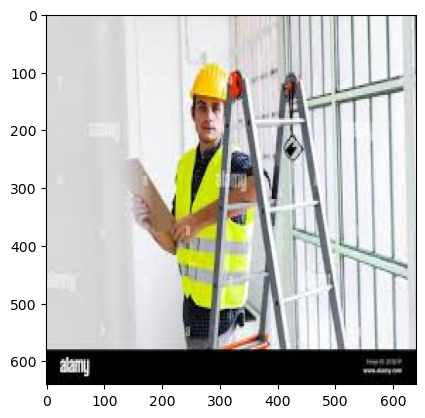

In [16]:
pred_image('pos/helmet_jacket_07355.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step

Predicted Class: pos

Confidence Score: 0.9999984502792358


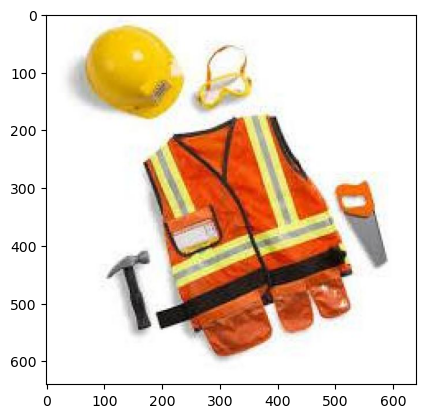

In [17]:
pred_image('pos/helmet_jacket_07360.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step

Predicted Class: neg

Confidence Score: 1.0


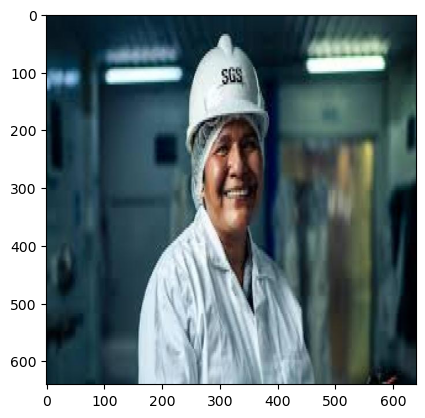

In [18]:
pred_image('pos/helmet_jacket_07361.jpg')

After randomly analysing 4 positive images, we can see that the model seem to be having issues identifying people not facing the camera as well as using white security protection. To continue with the analysis, lets use the df_results:

In [59]:
df_results.head() #confirm the architechture of the df

,name,pos,neg
0,../data2/test\neg\image_782.jpg,2.419998e-06,9.999849e-01
1,../data2/test\pos\helmet_jacket_07952.jpg,9.999999e-01,7.922895e-09
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000e+00
3,../data2/test\neg\image_272.jpg,1.855873e-11,1.000000e+00
4,../data2/test\pos\helmet_jacket_08494.jpg,5.821980e-03,9.745134e-01


In [60]:
df_results[df_results.neg>0.5] # filter by images categorized negative

,name,pos,neg
0,../data2/test\neg\image_782.jpg,2.419998e-06,0.999985
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000
3,../data2/test\neg\image_272.jpg,1.855873e-11,1.000000
4,../data2/test\pos\helmet_jacket_08494.jpg,5.821980e-03,0.974513
6,../data2/test\pos\helmet_jacket_07564.jpg,1.156370e-10,1.000000
...,...,...,...
3623,../data2/test\neg\image_857.jpg,1.302342e-03,0.970425
3624,../data2/test\neg\image_1218.jpg,2.319920e-17,1.000000
3625,../data2/test\neg\image_2214.jpg,3.130202e-06,0.999860
3626,../data2/test\neg\image_1568.jpg,1.386884e-02,0.977114


In [61]:
df_results['pred'] = 'pos' #create pred column as positive by default
df_results.loc[df_results.pos<df_results.neg, 'pred']='neg' #if the prob of negative is higher than prob of positive, assign negative
df_results.head() #confirm results

,name,pos,neg,pred
0,../data2/test\neg\image_782.jpg,2.419998e-06,9.999849e-01,neg
1,../data2/test\pos\helmet_jacket_07952.jpg,9.999999e-01,7.922895e-09,pos
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000e+00,neg
3,../data2/test\neg\image_272.jpg,1.855873e-11,1.000000e+00,neg
4,../data2/test\pos\helmet_jacket_08494.jpg,5.821980e-03,9.745134e-01,neg


In [62]:
df_results['label'] = 'neg' #create a label column as neg by default
df_results.loc[df_results.name.str.contains('pos'), 'label'] = 'pos' #label as positive only if identified as such
df_results.head()

,name,pos,neg,pred,label
0,../data2/test\neg\image_782.jpg,2.419998e-06,9.999849e-01,neg,neg
1,../data2/test\pos\helmet_jacket_07952.jpg,9.999999e-01,7.922895e-09,pos,pos
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000e+00,neg,pos
3,../data2/test\neg\image_272.jpg,1.855873e-11,1.000000e+00,neg,neg
4,../data2/test\pos\helmet_jacket_08494.jpg,5.821980e-03,9.745134e-01,neg,pos


In [67]:
false_pos = df_results[(df_results.pred != df_results.label) & (df_results.pred == 'pos')] #false positives labeled negative and categorized positive

In [68]:
1-(len(false_pos)/len(df_results)) #calculate the accuracy

0.8335629650041334

In [72]:
false_pos.sort_values('pos', ascending = False)

,name,pos,neg,pred,label
3628,../data2/test\neg\image_2438.jpg,1.000000,5.685511e-11,pos,neg
579,../data2/test\neg\image_763.jpg,1.000000,4.515746e-11,pos,neg
2028,../data2/test\neg\image_1843.jpg,1.000000,7.045952e-12,pos,neg
653,../data2/test\neg\image_1099.jpg,1.000000,1.985954e-09,pos,neg
2106,../data2/test\neg\image_1934.jpg,1.000000,5.804765e-10,pos,neg
...,...,...,...,...,...
2650,../data2/test\neg\image_1597.jpg,0.304202,1.408846e-01,pos,neg
172,../data2/test\neg\image_347.jpg,0.287766,1.989585e-01,pos,neg
1632,../data2/test\neg\image_1195.jpg,0.231788,2.752113e-02,pos,neg
2364,../data2/test\neg\image_793.jpg,0.229192,1.393348e-01,pos,neg


Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step

Predicted Class: neg

Confidence Score: 0.9999991655349731


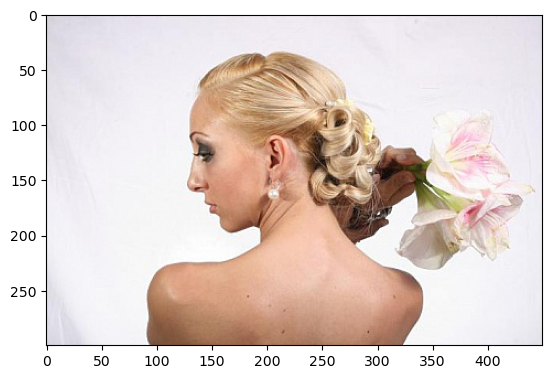

In [73]:
pred_image('neg\image_2438.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step

Predicted Class: neg

Confidence Score: 1.0


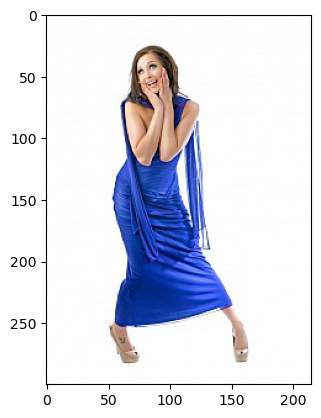

In [74]:
pred_image('neg\image_763.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step

Predicted Class: neg

Confidence Score: 1.0


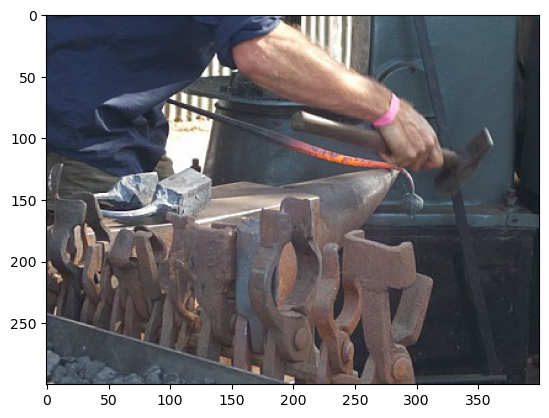

In [75]:
pred_image('neg\image_1843.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step

Predicted Class: neg

Confidence Score: 1.0


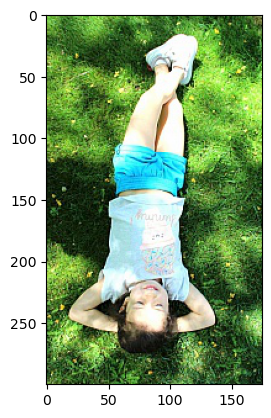

In [76]:
pred_image('neg\image_1099.jpg')

In [77]:
false_neg = df_results[(df_results.pred != df_results.label) & (df_results.pred == 'neg')] #false negative labeled positive and categorized negative

In [78]:
1-(len(false_neg)/len(df_results))

0.68751722237531

In [80]:
false_neg.sort_values('neg', ascending = False)

,name,pos,neg,pred,label
2,../data2/test\pos\helmet_jacket_08715.jpg,4.974043e-22,1.000000,neg,pos
2086,../data2/test\pos\helmet_jacket_07747.jpg,4.845678e-22,1.000000,neg,pos
2041,../data2/test\pos\helmet_jacket_07625.jpg,7.362412e-15,1.000000,neg,pos
2049,../data2/test\pos\helmet_jacket_07506.jpg,3.002228e-21,1.000000,neg,pos
2058,../data2/test\pos\helmet_jacket_08590.jpg,3.235934e-06,1.000000,neg,pos
...,...,...,...,...,...
2538,../data2/test\pos\helmet_jacket_07438.jpg,5.594729e-02,0.276760,neg,pos
2884,../data2/test\pos\helmet_jacket_07428.jpg,2.315269e-01,0.243654,neg,pos
3229,../data2/test\pos\helmet_jacket_08367.jpg,1.293155e-01,0.199775,neg,pos
2526,../data2/test\pos\helmet_jacket_08288.jpg,1.040206e-01,0.176599,neg,pos


Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step

Predicted Class: neg

Confidence Score: 0.22723913192749023


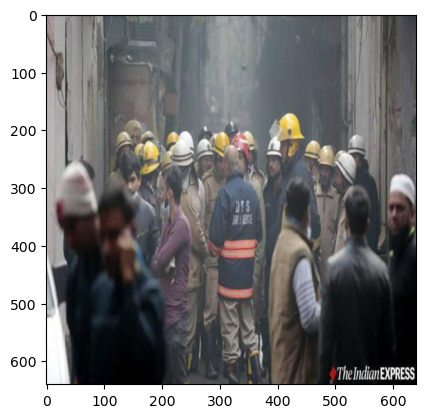

In [81]:
pred_image('pos\helmet_jacket_08715.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step

Predicted Class: neg

Confidence Score: 0.9997890591621399


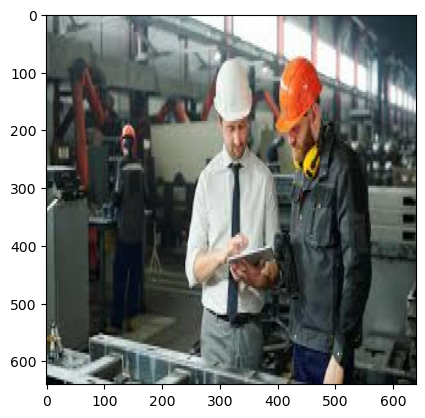

In [82]:
pred_image('pos\helmet_jacket_07747.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step

Predicted Class: pos

Confidence Score: 0.4206414818763733


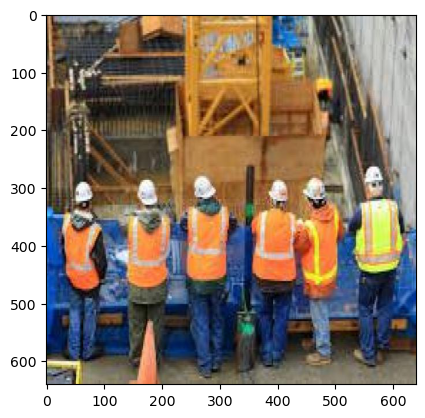

In [83]:
pred_image('pos\helmet_jacket_07625.jpg')

Picture of safety gear: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step

Predicted Class: pos

Confidence Score: 0.8527895212173462


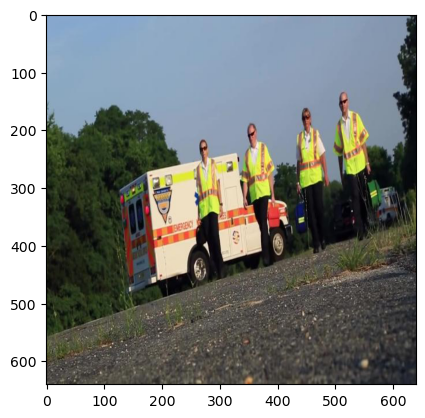

In [84]:
pred_image('pos\helmet_jacket_07506.jpg')

In [36]:
# Creating a Dataset for the Training data
test2 = tf.keras.utils.image_dataset_from_directory(
    "../data",  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['pos', 'neg'], #extensions of the folders holding the classes
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (400, 400), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 355 files belonging to 2 classes.


In [85]:
scaler = Rescaling(1./255) # Defining scaler values between 0 to 1
test2 = test2.map(lambda x, y: (scaler(x), y)) # Rescaling datasets

In [86]:
preds2 = model.predict(test2)  # Running model on the test dataset
val_loss, val_acc = model.evaluate(test2) # Obtaining Loss and Accuracy on the val dataset

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9003 - loss: 0.9780

Validation Loss:  0.7532526850700378

Validation Accuracy:  92.0 %
